# Máquina Linear

$$F_{ind} = i l B$$
$$F_t = F_{ind}+F_{apl} = m a$$
$$e_{ind} = v B l$$
$$V_B = e_{ind} + i R$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wdgts

In [2]:
VB = 10.0
Fapl = 1.0
R = 0.5
B = 1.0
l = 0.1
v0 = 0
dt = 0.1
T = 500
m = 1

In [3]:
index = 0
t0 = 0
t = np.arange(t0,T+t0+dt,dt)
eind = []
i = []
Find = []
v = [v0]
Pel = []
Pmec = []
while index*dt <= T:
    eind.append(v[index]*B*l)
    i.append((VB-eind[index])/R)
    Find.append(i[index]*l*B)
    Ft = Find[index]+Fapl
    a = Ft/m
    Pel.append(eind[index]*i[index])
    Pmec.append(Find[index]*v[index])
    v.append(v[index] + a * dt)
    index = index + 1
v.pop()

149.99327134537165

Text(0, 0.5, 'Tensão induzida [V]')

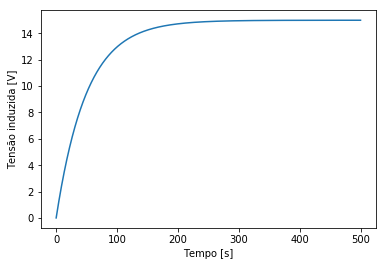

In [4]:
plt.plot(t,eind)
plt.xlabel("Tempo [s]")
plt.ylabel("Tensão induzida [V]")

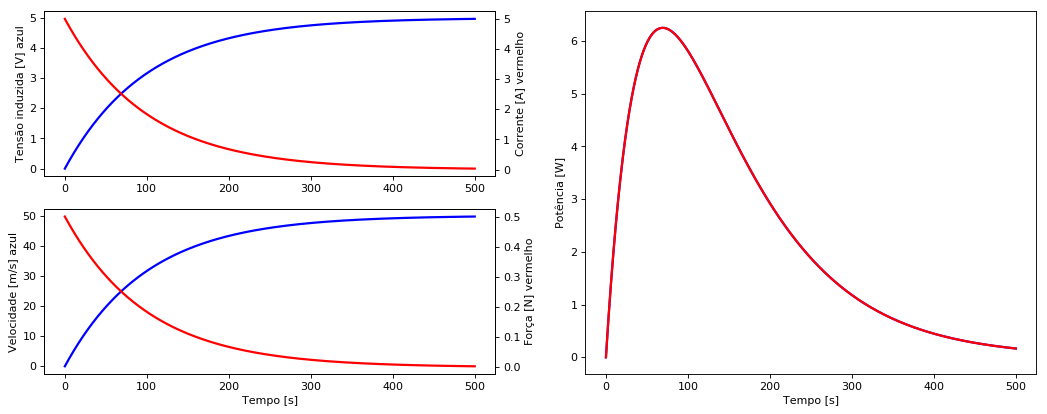

In [5]:
def maquinaLinear(VB = 10, Fapl = 0, R = 1, B = 1, l = 0.1, m = 1):
    fig = plt.figure(figsize=(16, 6), dpi=80)
    v0 = 0
    dt = 0.1
    T = 500
    index = 0
    t0 = 0
    t = np.arange(t0,T+t0+dt,dt)
    eind = []
    i = []
    Find = []
    v = [v0]
    Pel = []
    Pmec = []
    while index*dt <= T:
        eind.append(v[index]*B*l)
        i.append((VB-eind[index])/R)
        Find.append(i[index]*l*B)
        Ft = Find[index]+Fapl
        a = Ft/m
        Pel.append(eind[index]*i[index])
        Pmec.append(Find[index]*v[index])
        v.append(v[index] + a * dt)
        index = index + 1
    v.pop()
    ax1 = fig.add_subplot(2,2,1)
    ax1b = ax1.twinx()
    ax2 = fig.add_subplot(2,2,3)
    ax2b = ax2.twinx()
    ax3 = fig.add_subplot(1,2,2)
    ax1.plot (t, eind, color="blue", lw=2)
    ax1b.plot (t, i, color="red", lw=2)
    ax1.set_ylabel("Tensão induzida [V] azul")
    ax1b.set_ylabel("Corrente [A] vermelho")
    ax2.plot (t, v, color="blue", lw=2)
    ax2b.plot (t, Find, color="red", lw=2)
    ax2.set_ylabel("Velocidade [m/s] azul")
    ax2b.set_ylabel("Força [N] vermelho")
    ax2.set_xlabel("Tempo [s]")
    ax3.plot(t,Pel, color="blue", lw=2)
    ax3.plot(t,Pmec, color="red", lw=2)
    ax3.set_ylabel("Potência [W]")
    ax3.set_xlabel("Tempo [s]")
maquinaLinear(VB=5)

In [6]:
VBw=wdgts.FloatSlider(min=0,max=20,value=15,description="Tensão da bateria")
Faplw=wdgts.FloatSlider(min=-1.0,max=1.0,value=0.0,description="Força aplicada")
Rw=wdgts.FloatSlider(min=0.1,max=10.0,value=1.0,description="Resistência")
Bw=wdgts.FloatSlider(min=0.1,max=10.0,value=1.0,description="Campo Magnético")
lw=wdgts.FloatSlider(min=0.01,max=1.0,value=0.1,description="Comprimento")
mw=wdgts.FloatSlider(min=0.1,max=10,value=1.0,description="Massa")
leftBox = wdgts.VBox([VBw,Faplw,Rw,Bw,lw,mw])
plots = wdgts.interactive(maquinaLinear,
              VB=VBw,
              Fapl=Faplw,
              R=Rw,
              B=Bw,
              l=lw,
              m=mw)
rightBox = wdgts.VBox([plots])
tudo = wdgts.HBox([leftBox,rightBox])
rightBox

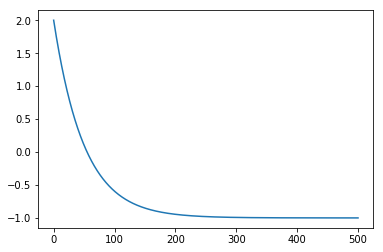

In [79]:
plt.plot(t,Find)

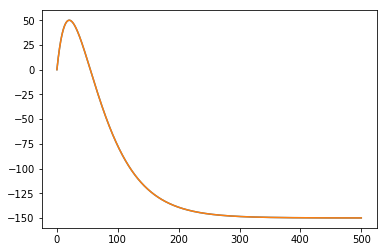

In [80]:
plt.plot(t,Pmec)
plt.plot(t,Pel)